# Final project code

## Infinite well

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook
from scipy.integrate import simps
from scipy.linalg import eig
import scipy as sp

In [3]:
def infinite_well(n,x,defined=False):
    """Returns eigenvalues and eigenvectors for an infinite well between -1 and 1.
    
    Parameters 
    ----------
    n: int
        Number of energy levels.
    x: array
        x points to be evaluated at between -1 to 1.
    defined: boolean, optional
        Whether to use a defined hamiltionian or not. By default a numerical
        hamiltonian is used.
        
    Returns
    -------
    eigenvalue: array
        Eigenvalue of system.
    eigenvector: ndarray
        Eigenvector of system.
    phi: list of arrays
        Evaluated basis functions at x with given n.
    """
    phi = []
    
    for i in range(n):
        basis = (x**i)*(x-1)*(x+1)
        phi.append(basis)
    
    S = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            S[i, j] = simps(phi[i]*phi[j],x)
            
    phi_for_H = []
            
    if defined == True:
        for i in range(n):
            double_diff = (i+2)*(i+1)*(x**i) - (i-1)*i*(x**(i-2))
            phi_for_H.append(-double_diff)
    else:
        for m in phi:
            fd = np.gradient(m,x) 
            sd = np.gradient(fd,x)
            phi_for_H.append(-sd)
    
    H = np.zeros((n,n))
    for k in range(n):
        for l in range(n):
            H[k, l] = simps(phi[k]*phi_for_H[l],x)
    
    eigenvalues, eigenvectors = eig(H,S)
    eigenvectors = eigenvectors[:,eigenvalues.argsort()]
    eigenvalues = eigenvalues[eigenvalues.argsort()]
    
    return eigenvalues, eigenvectors, phi

In [4]:
def energy_states(phi, eigenvector, e):
    """Returns the wave function for the corresponding energy level.
    
    Parameters
    ----------
    phi: list-like
        Evaluated basis functions.
    eigenvector: array
        Eigenvector corresponding to solution.
    e: int
        Energy level.
        
    Returns
    -------
    out: ndarray
        Values of wavefunction at given energy level.
    """
    state_values = np.zeros_like(x)
    for i in range(len(eigenvector)):
        state_values += phi[i]*eigenvector[i,e].real 
    return state_values

In [5]:
def plotter(x1,y1,x2,y2,xlabel,ylabel,title1,title2,ticks=False,xticks=None,style=''):
    """Returns a 1x2 subplot for comparison of graphs.
    
    Parameters
    ----------
    x1,y1,x2,y2: array or array-like
        Coressponding x and y values for first and second graph.
    xlabel,ylabel: str
        Corresponding x and y axis labels.
    title1,title2: str
        Corresponding titles for graphs.
    ticks: boolean, optional
        Whether you want to define x values or not.
    xticks: array or array-like
        The specified x values to be displayed.
    """
    f, axr = plt.subplots(1,2,sharex=True,figsize=(9,7))
    axr[0].set_xlabel(xlabel)
    
    if ticks == True:
        axr[0].set_xticks(xticks)
    
    axr[0].set_ylabel(ylabel)
    axr[0].set_title(title1)
    axr[0].grid(True)
    axr[0].plot(x1,y1,style)
    axr[1].set_xlabel(xlabel)
    axr[1].set_ylabel(ylabel)
    axr[1].set_title(title2)
    axr[1].grid(True)
    axr[1].plot(x2,y2,'r' + style)
    plt.subplots_adjust(wspace=0.3)

<IPython.core.display.Javascript object>


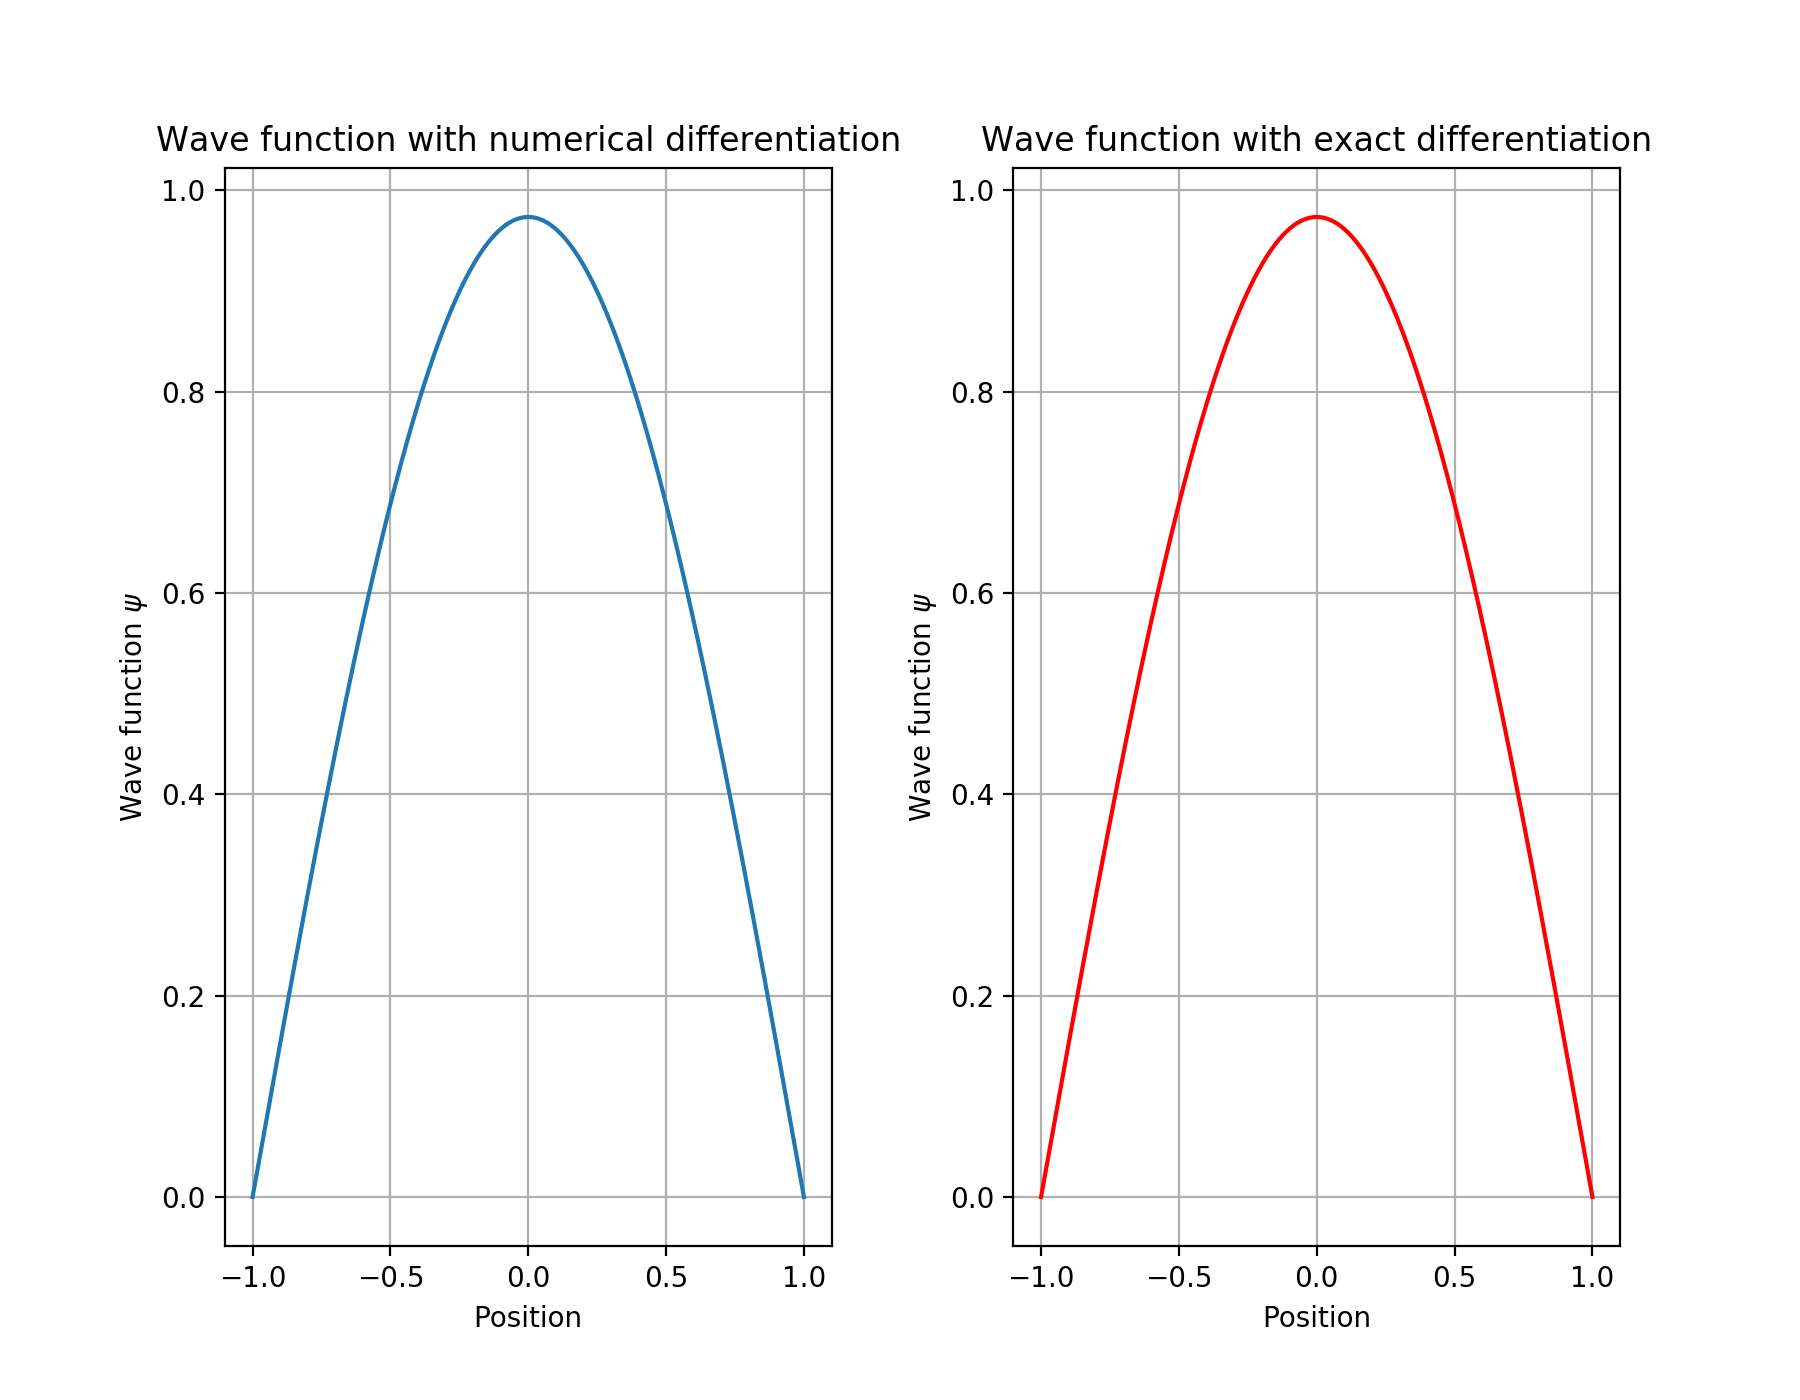

In [49]:
x = np.linspace(-1,1,1000)

solutions = infinite_well(9,x)

defined_solutions = infinite_well(9,x,defined=True)

plotter(x1=x,
        y1=energy_states(solutions[2],solutions[1],0),
        x2=x,
        y2=energy_states(defined_solutions[2],defined_solutions[1],0),
        xlabel="Position",
        ylabel="Wave function $\psi$",
        title1="Wave function with numerical differentiation",
        title2="Wave function with exact differentiation"
)

In [45]:
def energy_calculator(n,qho=False):
    """Returns the discrete energy values for an infinite well from -1 to 1 or for a QHO.
    
    Parameters
    ----------
    n: int
        Number of energy values to calculate.
    qho: boolean, optional
        Return the energy levels of a QHO instead.
        
    Returns
    -------
    energy values: list
        Discrete energy values.
    energy levels: list
        Energy levels from 0 for QHO or 1 for infinite well.
    """
    energy_values = []
    
    if qho == True:
        for i in range(n):
            calculated_values = i + 1/2
            energy_values.append(calculated_values)
        
        energy_levels = [i for i in range(len(energy_values))]
        return energy_values, energy_levels
    
    else:
        for i in range(1, n + 1):
            calculated_values = ((i**2) * (np.pi**2) * 4)/16 # where hbar^2 = 4, m = 2 and L = 2.
            energy_values.append(calculated_values)    

        energy_levels = [i for i in range(1, len(energy_values) + 1)]
        return energy_values, energy_levels

<IPython.core.display.Javascript object>


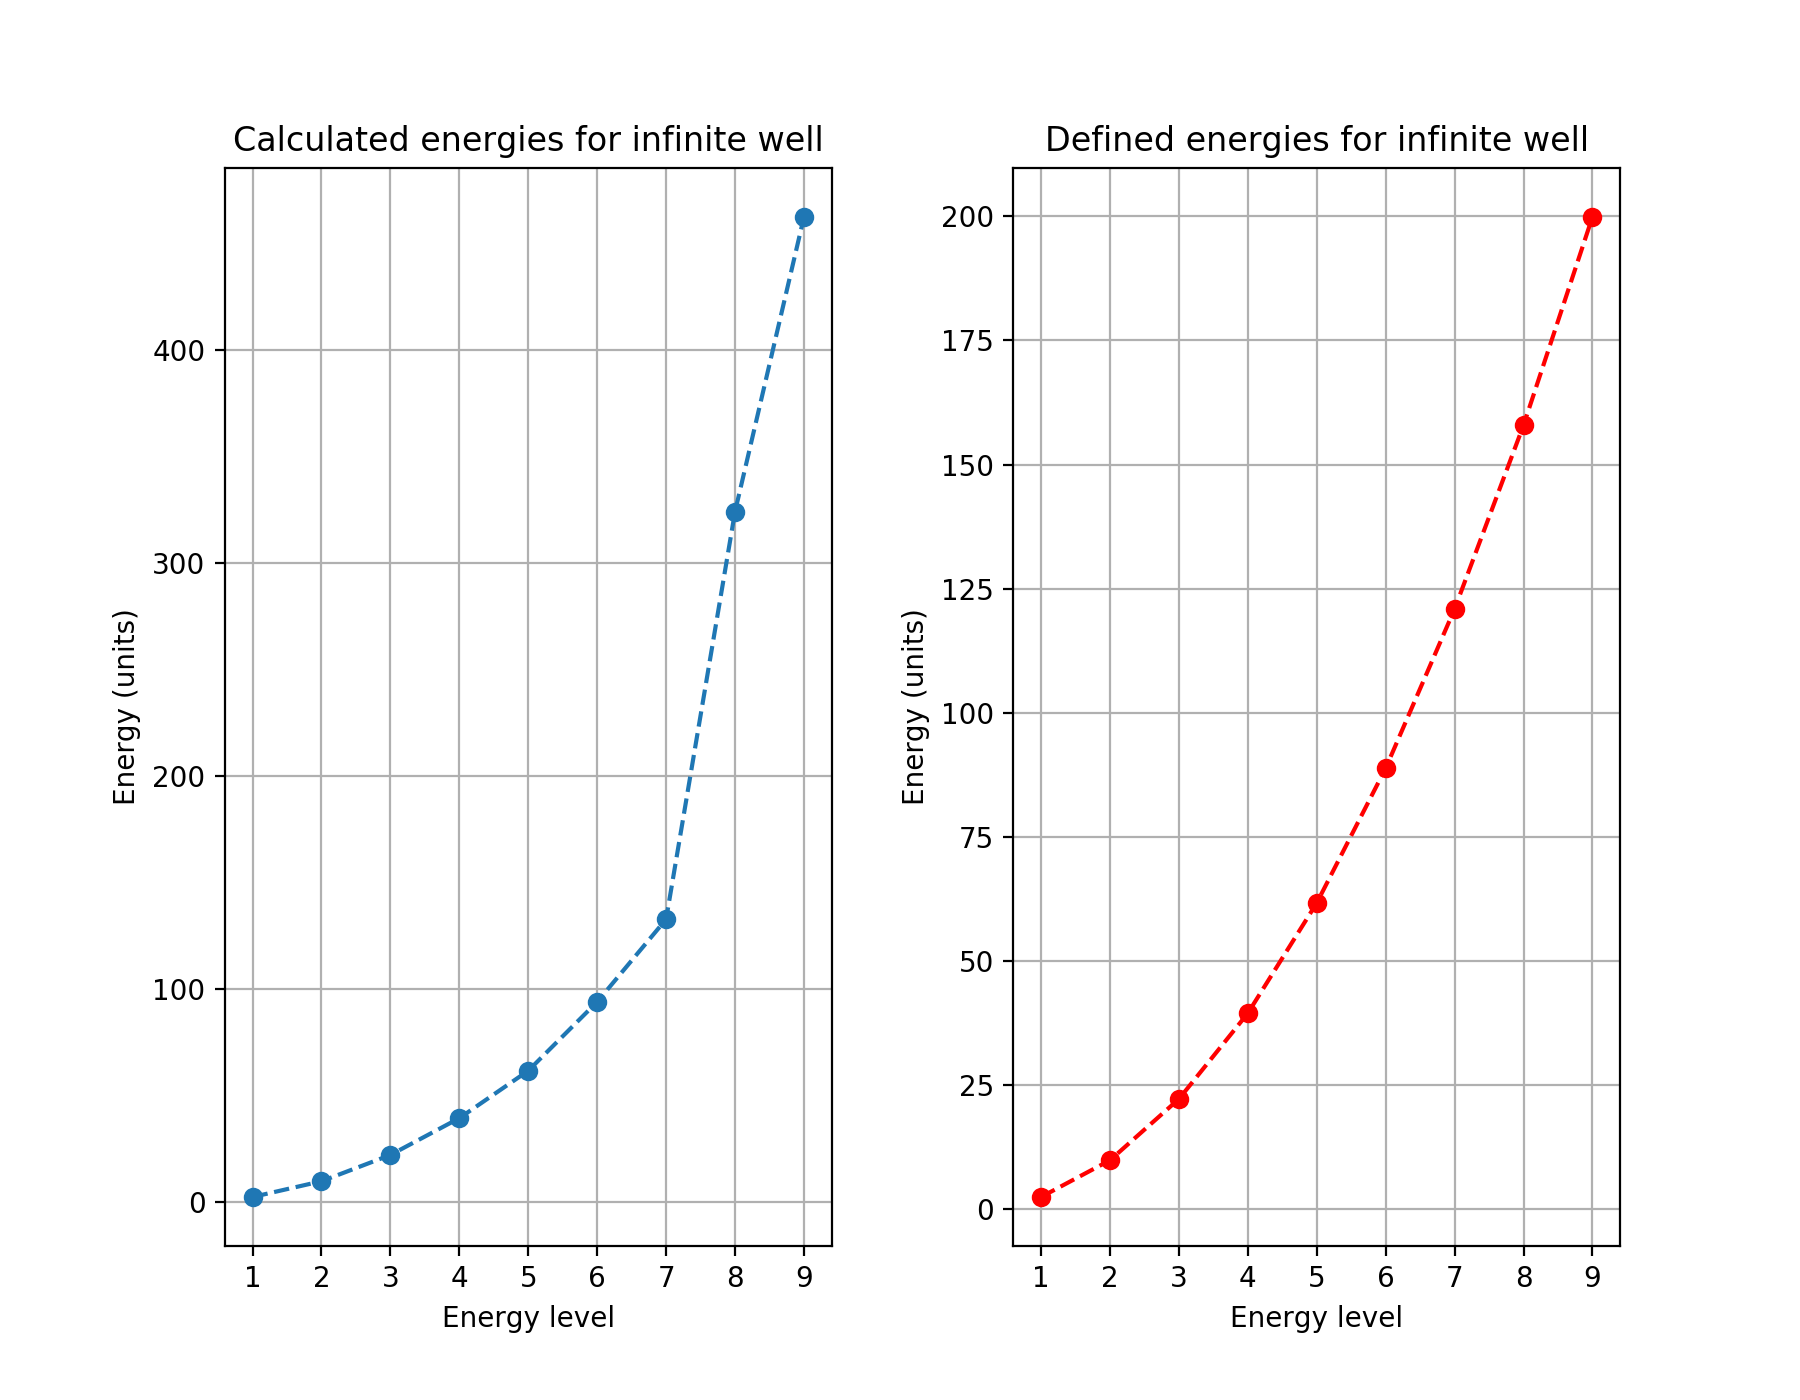

In [42]:
energies, energylevels = energy_calculator(9) # change to match n of solutions

plotter(x1=energylevels,
        y1=solutions[0].real,
        style="o--",
        x2=energylevels,
        y2=energies,
        xlabel="Energy level",
        ylabel="Energy (units)",
        title1="Calculated energies for infinite well",
        title2="Defined energies for infinite well",
        ticks=True,
        xticks=energylevels
)

## QHO and Anharmonic Oscillator

In [9]:
def quantum_oscillator(n,x,potential=0):
    """Returns eigenvalues and eigenvectors for a quantum oscillator.
    
    Parameters 
    ----------
    n: int
        Number of energy levels.
    x: array
        x points to be evaluated at.
    potential: function, optional
        Given potential to be added to the system to make it anharmonic.
    
    Returns
    -------
    eigenvalue: array
        Eigenvalue of system.
    eigenvector: ndarray
        Eigenvector of system.
    phi: list of arrays
        Evaluated basis functions at x with given n.
    """
    qo_phi = []
    
    for i in range(n):
        qo_basis = sp.special.eval_hermite(i,x)*np.exp((-x**2)/2)
        qo_phi.append(qo_basis)
    
    S = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            S[i, j] = simps(qo_phi[i]*qo_phi[j],x)
        
    qo_phi_H = []
    
    for m in qo_phi:
        fd = np.gradient(m,x) 
        sd = np.gradient(fd,x)
        values = -1/2*sd + 1/2*(x**2) + potential
        qo_phi_H.append(values)
        
    
    H = np.zeros((n,n))
    for k in range(n):
        for l in range(n):
            H[k, l] = simps(qo_phi[k]*qo_phi_H[l],x)
    
    qo_eigenvalues, qo_eigenvectors = eig(H,S)
    qo_eigenvectors = qo_eigenvectors[:,qo_eigenvalues.argsort()]
    qo_eigenvalues = qo_eigenvalues[qo_eigenvalues.argsort()]
    
    return qo_eigenvalues, qo_eigenvectors, qo_phi

<IPython.core.display.Javascript object>


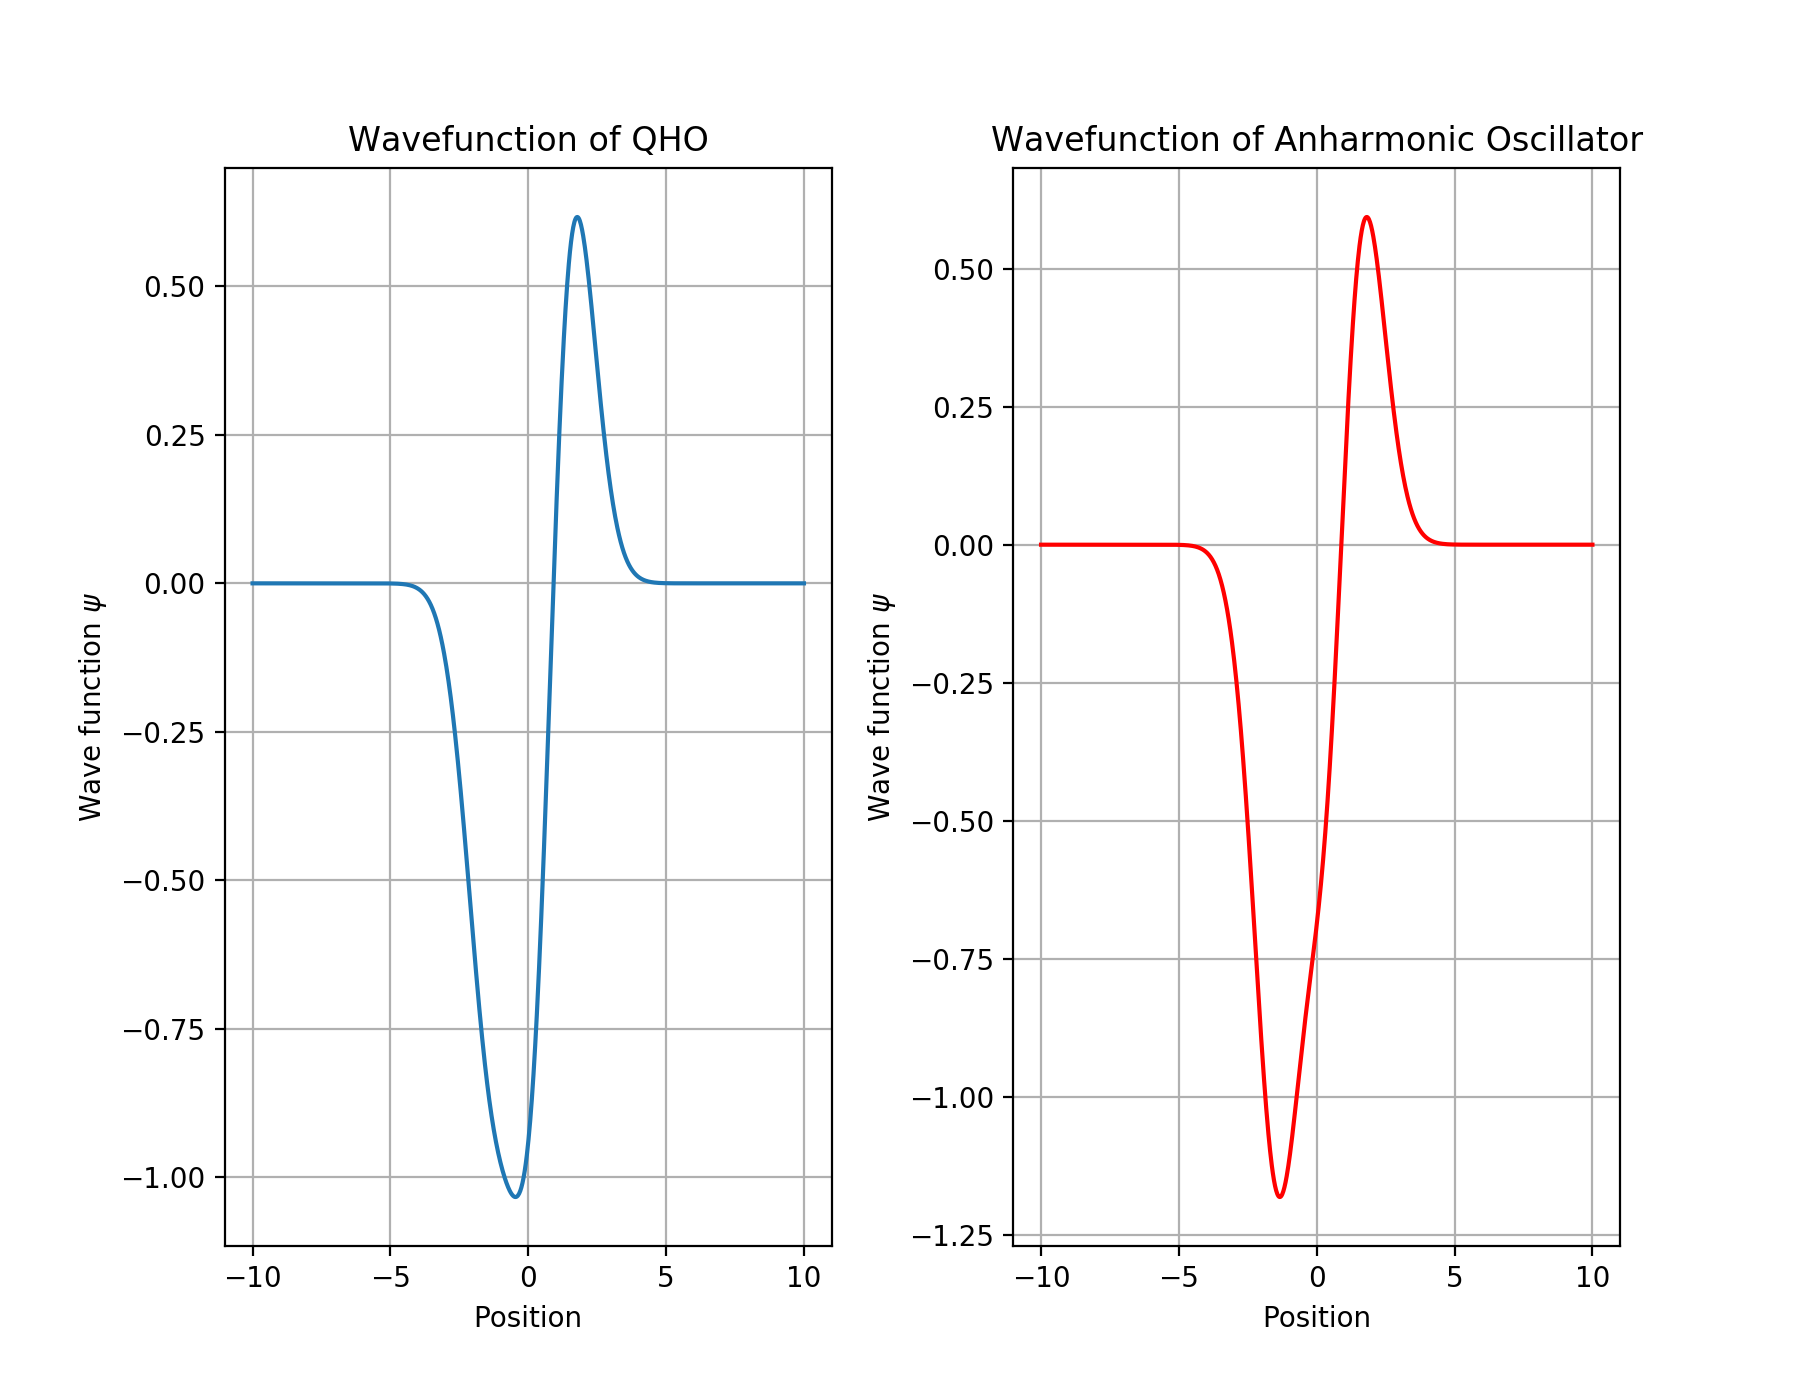

In [40]:
x = np.linspace(-10,10,1000)

qho_solutions = quantum_oscillator(4,x)

anharmonic_solutions = quantum_oscillator(4,x,potential=x)

plotter(x1=x,
        y1=energy_states(qho_solutions[2],qho_solutions[1],0),
        x2=x,
        y2=energy_states(anharmonic_solutions[2],anharmonic_solutions[1],0),
        xlabel="Position",
        ylabel="Wave function $\psi$",
        title1="Wavefunction of QHO",
        title2="Wavefunction of Anharmonic Oscillator"
)

<IPython.core.display.Javascript object>


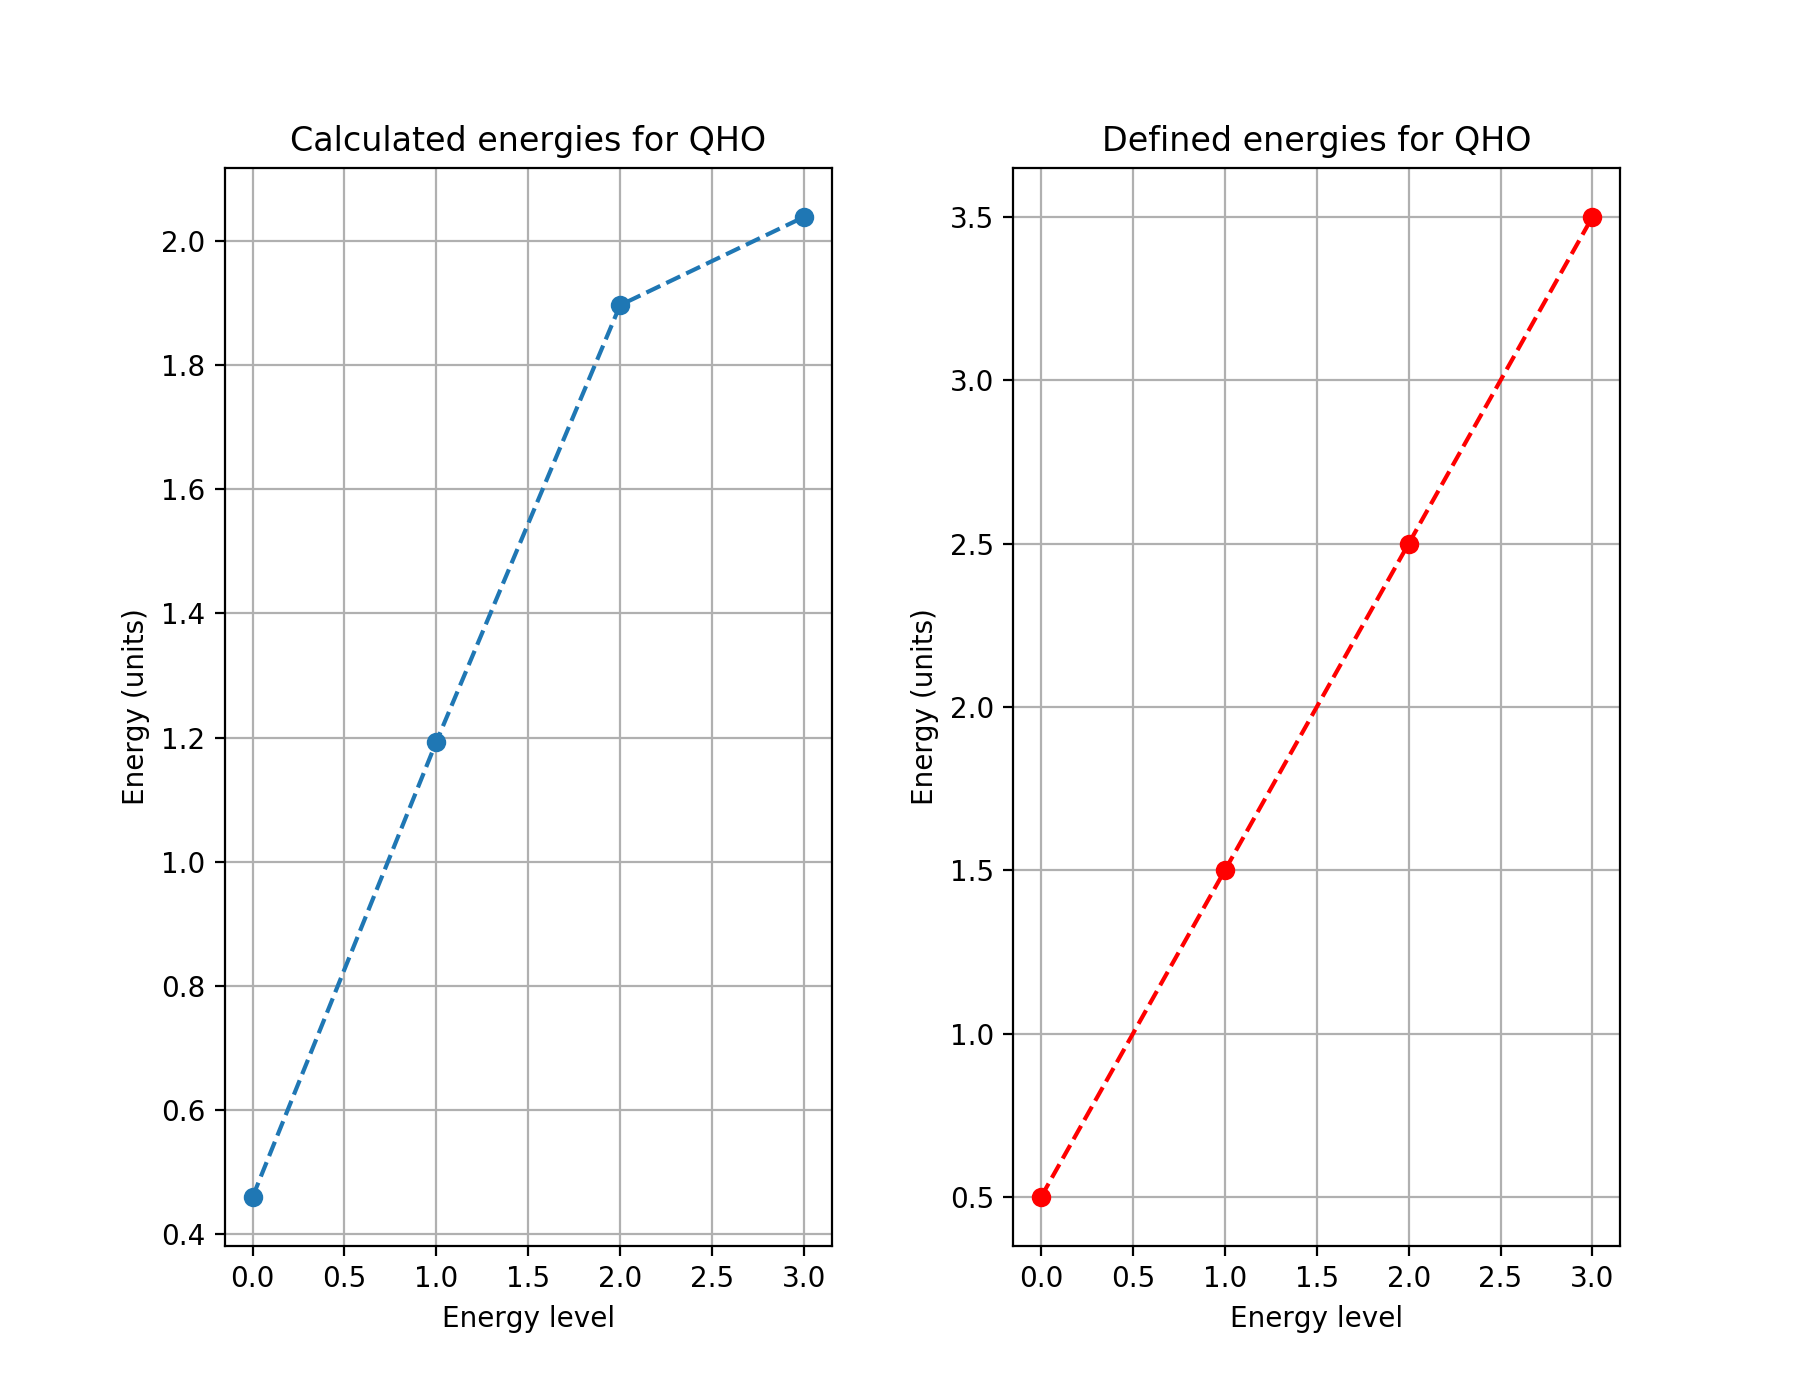

In [44]:
qho_energies, qho_energylevels = energy_calculator(4,qho=True)

plotter(x1=qho_energylevels,
        y1=qho_solutions[0].real,
        style="o--",
        x2=qho_energylevels,
        y2=qho_energies,
        xlabel="Energy level",
        ylabel="Energy (units)",
        title1="Calculated energies for QHO",
        title2="Defined energies for QHO",
)